The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.



In [2]:
# import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [3]:
train=pd.read_csv("~/Desktop/csv files/Train_UWu5bXk.csv")
test=pd.read_csv("~/Desktop/csv files/Test_u94Q5KV.csv")

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [256]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [190]:
train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [196]:
a=train[pd.notnull(train.Item_Weight)]

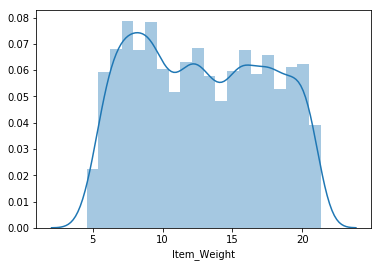

In [197]:
sns.distplot(a.Item_Weight)

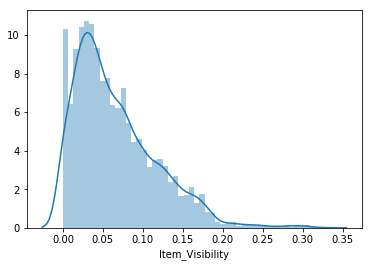

In [198]:
sns.distplot(train.Item_Visibility)

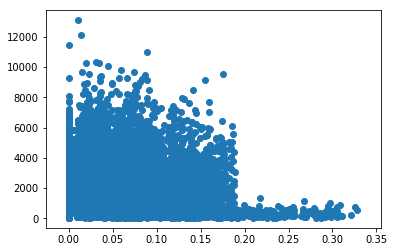

In [105]:
plt.scatter(x="Item_Visibility",y="Item_Outlet_Sales",data=train)

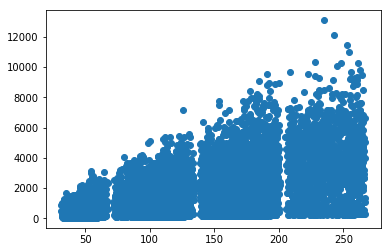

In [200]:
#mrp vs oulet sales
plt.scatter(x=train.Item_MRP,y=train.Item_Outlet_Sales)

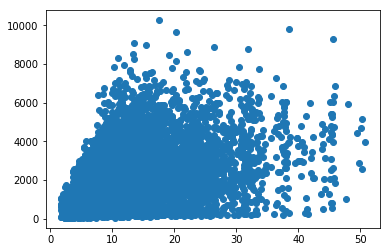

In [107]:
plt.scatter(train.Item_MRP/train.Item_Weight,y=train.Item_Outlet_Sales)

In [203]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,price_per_unit
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1,10.520458
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store,16.558479
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1,21.193985
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


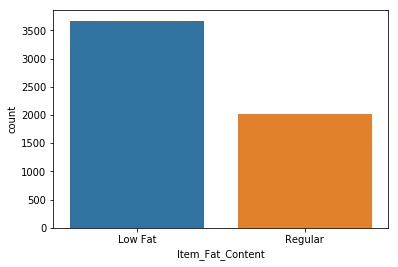

In [111]:
sns.countplot(test.Item_Fat_Content)

In [204]:
train_copy=train

In [225]:
train[train.Item_Fat_Content=="LOW FAT"].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
27,DRJ59,11.650,LOW FAT,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312
45,FDM39,6.420,LOW FAT,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LOW FAT,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
74,NCZ18,7.825,LOW FAT,0.186357,Household,254.3698,OUT049,1999,Medium,Tier 1,Supermarket Type1,5580.7356
82,FDV45,16.750,LOW FAT,0.045231,Snack Foods,187.9556,OUT018,2009,Medium,Tier 3,Supermarket Type2,4693.8900


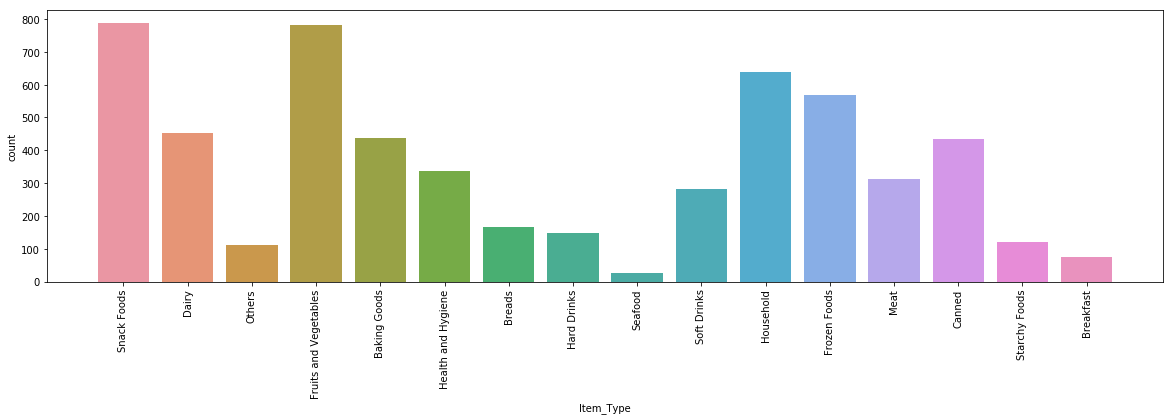

In [209]:
plt.figure(figsize=[20,5])
plt.xticks(rotation=90)
sns.countplot((test.Item_Type))
plt.autoscale()

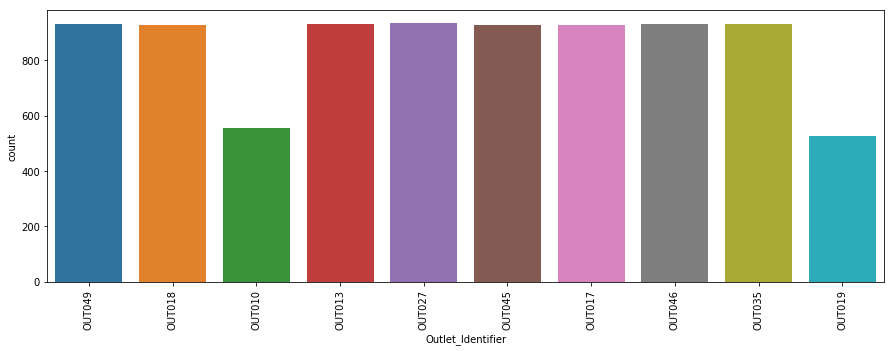

In [79]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.countplot(train.Outlet_Identifier)

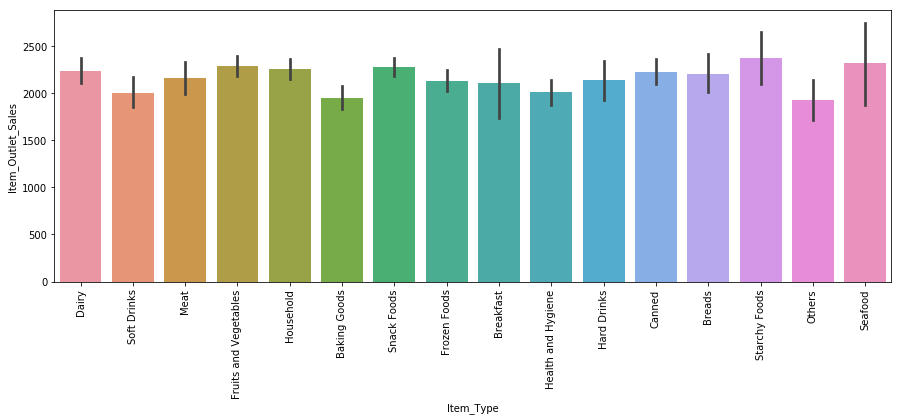

In [113]:
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)

sns.barplot(x="Item_Type",y="Item_Outlet_Sales",data=train)

# misssing values

In [8]:
train.Item_Weight.fillna(train.Item_Weight.median(),inplace=True)
test.Item_Weight.fillna(test.Item_Weight.median(),inplace=True)

# another method  imputation
#test.groupby("Outlet_Identifier").transform(lambda x : x.fillna(x.notnull().mean()))
print(test.isnull().sum().sum())
print(train.isnull().sum().sum())

0
0


In [7]:
#correcting Item_fat content columns
train.Item_Fat_Content.replace(to_replace=["LF", "low fat","Low Fat", "reg"],value=["LOW FAT","LOW FAT","LOW FAT","Regular"],inplace=True)
test.Item_Fat_Content.replace(to_replace=["LF", "low fat","Low Fat" , "reg"],value=["LOW FAT","LOW FAT","LOW FAT","Regular"],inplace=True)

In [281]:
train.Item_Fat_Content.value_counts()

LOW FAT    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [6]:
#creating a new variable called price_per_unit


train["price_per_unit"]=train.Item_MRP/train.Item_Weight
test["price_per_unit"]=test.Item_MRP/test.Item_Weight

In [5]:
#for removing zeros in visibility
train.Item_Visibility.replace(to_replace=0,value=0.053931,inplace=True)
test.Item_Visibility.replace(to_replace=0,value=0.053931,inplace=True)
#removing null values in outlet _size
train.Outlet_Size.fillna("Medium",inplace=True)
test.Outlet_Size.fillna("Medium",inplace=True)



In [122]:
train.Item_Identifier.value_counts().head()

FDW13    10
FDG33    10
FDQ40     9
FDF52     9
NCY18     9
Name: Item_Identifier, dtype: int64

In [124]:
train[train.Item_Identifier=="FDW13"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
256,FDW13,8.5,Low Fat,0.098438,Canned,51.1324,OUT017,2007,NaN,Tier 2,Supermarket Type1,259.6620
1141,FDW13,8.5,Low Fat,0.097866,Canned,51.1324,OUT035,2004,Small,Tier 2,Supermarket Type1,1350.2424
2190,FDW13,8.5,Low Fat,0.098283,Canned,51.3324,OUT018,2009,Medium,Tier 3,Supermarket Type2,934.7832
3928,FDW13,12.6,Low Fat,0.097411,Canned,52.7324,OUT027,1985,Medium,Tier 3,Supermarket Type3,2492.7552
3978,FDW13,8.5,Low Fat,0.098037,Canned,51.5324,OUT049,1999,Medium,Tier 1,Supermarket Type1,882.8508
6499,FDW13,8.5,Low Fat,0.098083,Canned,50.3324,OUT045,2002,NaN,Tier 2,Supermarket Type1,675.1212
6587,FDW13,8.5,Low Fat,0.163839,Canned,51.3324,OUT010,1998,NaN,Tier 3,Grocery Store,311.5944
7029,FDW13,8.5,Low Fat,0.097803,Canned,50.5324,OUT013,1987,High,Tier 3,Supermarket Type1,882.8508
8025,FDW13,12.6,Low Fat,0.171384,Canned,50.5324,OUT019,1985,Small,Tier 1,Grocery Store,207.7296
8032,FDW13,8.5,Low Fat,0.097885,Canned,52.5324,OUT046,1997,Small,Tier 1,Supermarket Type1,1194.4452


In [125]:
train[train.Item_Identifier=="FDG33"].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
231,FDG33,12.600,Regular,0.139561,Seafood,170.4764,OUT027,1985,Medium,Tier 3,Supermarket Type3,3435.5280
1202,FDG33,5.365,Regular,0.140525,Seafood,172.7764,OUT045,2002,NaN,Tier 2,Supermarket Type1,2233.0932
1575,FDG33,12.600,Regular,0.245543,Seafood,172.2764,OUT019,1985,Small,Tier 1,Grocery Store,171.7764
2728,FDG33,5.365,Regular,0.234733,Seafood,173.4764,OUT010,1998,NaN,Tier 3,Grocery Store,171.7764
4747,FDG33,5.365,Regular,0.140458,Seafood,169.7764,OUT049,1999,Medium,Tier 1,Supermarket Type1,3263.7516
5164,FDG33,5.365,Regular,0.140240,Seafood,171.0764,OUT046,1997,Small,Tier 1,Supermarket Type1,3263.7516
6112,FDG33,5.365,Regular,0.141034,Seafood,173.6764,OUT017,2007,NaN,Tier 2,Supermarket Type1,858.8820
7011,FDG33,5.365,Regular,0.140812,Seafood,173.5764,OUT018,2009,Medium,Tier 3,Supermarket Type2,2061.3168
7098,FDG33,5.365,Regular,0.140124,Seafood,172.0764,OUT013,1987,High,Tier 3,Supermarket Type1,2748.4224
7726,FDG33,5.365,Regular,0.140214,Seafood,173.7764,OUT035,2004,Small,Tier 2,Supermarket Type1,4637.9628


In [150]:
train.Item_Identifier[2][:2]

'FD'

In [9]:
#adding item id column in the test dataset
itemid=[]
for i in range(0,5681):
    itemid.append(test.Item_Identifier[i][0:2])

test["item_id"]=pd.Series(itemid)

In [10]:
#adding item id column in train data set and deleting item identifier
itemid1=[]
for i in range(0,8523):
    itemid1.append(train.Item_Identifier[i][0:2])

train["item_id"]=pd.Series(itemid1)

In [18]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [14]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,price_per_unit,item_id
0,20.750,LOW FAT,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1,5.198178,FD
1,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1,10.520458,FD
2,14.600,LOW FAT,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store,16.558479,NC
3,7.315,LOW FAT,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1,21.193985,FD
4,12.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3,18.738400,FD


In [12]:
test.info()
test.drop("Item_Identifier",axis=1,inplace=True)
train.drop("Item_Identifier",axis=1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 13 columns):
Item_Identifier              5681 non-null object
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
price_per_unit               5681 non-null float64
item_id                      5681 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 577.1+ KB


In [15]:
train.Item_Fat_Content.value_counts()

LOW FAT    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [237]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
price_per_unit               8523 non-null float64
dtypes: float64(5), int64(1), object(7)
memory usage: 865.7+ KB


In [16]:
print(test.shape)
print(train.shape)


(5681, 12)
(8523, 13)


In [17]:
newtest=test.drop(columns="Outlet_Establishment_Year",axis=1)
newtrain=train.drop(columns="Outlet_Establishment_Year",axis=1)

In [19]:
print(newtrain.shape)
print(newtest.shape)

(8523, 12)
(5681, 11)


In [20]:
#getting dummies variable
ohe_train=pd.get_dummies(newtrain)
ohe_test=pd.get_dummies(newtest)

In [21]:
print(ohe_test.shape)
print(ohe_train.shape)

(5681, 45)
(8523, 46)


# apply decision tree


In [22]:
#scaling the dataset 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_train=pd.DataFrame(sc.fit_transform(ohe_train),columns=ohe_train.columns)
scaled_test=pd.DataFrame(sc.fit_transform(ohe_test),columns=ohe_test.columns)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [29]:
scaled_test.head()
testsc=sc.fit_transform(pd.DataFrame(sc.fit_transform(ohe_test)))
saveit = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [311]:
scaled_test.shape 

(5681, 45)

In [312]:
scaled_train.shape 

(8523, 46)

In [20]:
#apply decision tree
from sklearn.tree import DecisionTreeRegressor
dtree=DecisionTreeRegressor()
model_tree=dtree.fit(scaled_train.drop("Item_Outlet_Sales",axis=1),scaled_train.Item_Outlet_Sales)
prediction=model_tree.predict(scaled_test)

In [27]:
prediction

array([ 0.13063464, -0.7160522 , -0.40976226, ..., -0.0445554 ,
        2.96879135, -0.77613965])

In [33]:
pred=sc.inverse_transform(pd.DataFrame(prediction))


In [34]:
pred

array([[2404.2038],
       [ 959.4178],
       [1482.0708],
       ...,
       [2105.2596],
       [7247.233 ],
       [ 856.8846]])

In [30]:
scaled_train.drop("Item_Outlet_Sales",axis=1).head()

,Item_Weight,Item_Visibility,Item_MRP,price_per_unit,Item_Fat_Content_LOW FAT,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,item_id_DR,item_id_FD,item_id_NC
0,-0.831187,-1.092518,1.747454,1.897563,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
1,-1.630810,-1.026432,-1.489023,-0.567860,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,-0.696678,1.242650,-0.381529,-1.375891,2.860816,-0.351028,3.109193,-1.598190,-0.480558
2,1.108727,-1.077939,0.010040,-0.575915,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,1.602840,-0.696678,-0.804732,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
3,1.510904,-0.317640,0.660050,-0.392513,-1.354743,1.354743,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,-0.696678,1.242650,2.621031,-1.375891,-0.349551,-0.351028,-0.321627,0.625708,-0.480558
4,-0.918719,-0.317640,-1.399220,-0.847521,0.738147,-0.738147,-0.286855,-0.174193,-0.114346,-0.287094,...,-0.623893,-0.696678,1.242650,-0.381529,0.726802,-0.349551,-0.351028,-0.321627,-1.598190,2.080915


In [32]:
scaled_train.Item_Outlet_Sales.head()

0    0.910601
1   -1.018440
2   -0.049238
3   -0.849103
4   -0.695373
Name: Item_Outlet_Sales, dtype: float64

In [363]:
pd.DataFrame(pred).to_csv("big_sale.csv",index=False)

In [29]:
pred

array([[2404.2038],
       [ 959.4178],
       [1482.0708],
       ...,
       [2105.2596],
       [7247.233 ],
       [ 856.8846]])

In [39]:
# apllying random forest 
from sklearn.ensemble import RandomForestRegressor
radfor=RandomForestRegressor(bootstrap=True, criterion="mse", max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
radfor

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [40]:
 prirandfor=radfor.fit(scaled_train.drop("Item_Outlet_Sales",axis=1),scaled_train.Item_Outlet_Sales).predict(scaled_test)

In [41]:
prirandfor

array([-0.25143548, -0.30753134, -0.9576181 , ..., -0.25143548,
        0.9231522 , -0.44075313])

In [42]:
unscaled=sc.inverse_transform(prirandfor)



In [ ]:
saveit = sc.fit_transform(pd.DataFrame(train.Item_Outlet_Sales))

In [43]:
#solution
solution=pd.read_csv("~/Downloads/SampleSubmission_TmnO39y.csv")
submission=pd.DataFrame({"Item_Identifier":solution.Item_Identifier,
                        "Outlet_Identifier":solution.Outlet_Identifier,
                        "Item_Outlet_Sales":unscaled})

In [44]:
submission.to_csv("bigmart",index=False)